final notebook

In [21]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmaps
from cmcrameri import cm as cmc


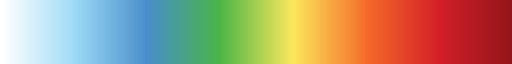

In [16]:

cmaps.precip2_17lev
cmaps.wh_bl_gr_ye_re
cmaps.WhiteBlueGreenYellowRed


In [51]:
# couple of realizations for 1 clusters
sfile = '../model_output/RUN_230830T1526_S1_ptotC_stormsC.nc'   # 1 CLUSTERS

# usually you do "mask_and_scale=True"... but not in this case!

ds = xr.open_mfdataset(sfile, group='run_01', combine='nested',# concat_dim='time',
    decode_times=True, use_cftime=True, decode_cf=True, mask_and_scale=True)#, data_vars=['rain'],)
ds = ds.assign_coords({'y':ds.projection_y_coordinate.load(),'x':ds.projection_x_coordinate.load()})

storm = ds[ 'year_2023' ].load()
skams = ds['k_means'].load()
ds.close()

print( storm )
print( skams )

<xarray.DataArray 'year_2023' (time_001: 3515, y: 470, x: 408)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
   

In [52]:


# seasonal rain
tormen = storm.astype( 'f8' ).round(3)#.sum(axis=0)
season = tormen.sum(axis=0)
# season[2:7,160:165]

print( season )



<xarray.DataArray 'year_2023' (y: 470, x: 408)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    projection_y_coordinate  (y) int32 1167500 1162500 ... -1172500 -1177500
    projection_x_coordinate  (x) int32 1342500 1347500 ... 3372500 3377500
  * y                        (y) int32 1167500 1162500 ... -1172500 -1177500
  * x                        (x) int32 1342500 1347500 ... 3372500 3377500



#-visual testing
#---------------


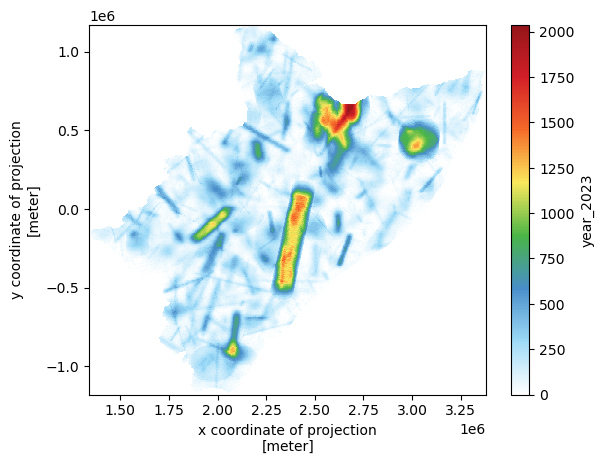

In [53]:

# season.plot(cmap='precip2_17lev')
season.plot(cmap='WhiteBlueGreenYellowRed')


In [19]:

# season.where(skams==2, np.nan).plot(vmin=.001, robust=True)


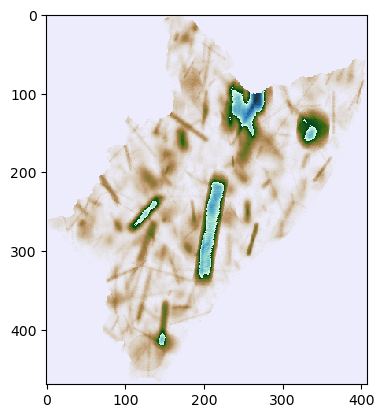

In [54]:

plt.imshow(season.data, origin='upper', cmap=cmc.bukavu_r, interpolation='none')


In [28]:

# plt.imshow(skams.data, origin='upper', cmap='turbo', interpolation='none')


In [57]:

# masks
kmeans = xr.where(skams!=-1, skams, np.nan)
# kmeans = skams.where(-1, np.nan)
kmeans = np.unique( kmeans.data )
kmeans = kmeans[ ~np.isnan(kmeans) ].astype('i1')
print( [xr.where(skams==x, skams, np.nan).count().data for x in kmeans] )

[array(86293)]


In [58]:


# output kmeans
ks = list(map(lambda x:xr.where(skams==x, season, np.nan).mean().data, kmeans))
out_ks = pd.DataFrame({'k':kmeans, 'mean_nc4':ks}, dtype='object')
# input kmeans
in_ks = pd.read_csv(sfile.replace('.nc','_kmeans.csv'))
# KMEANS from IN/OUT
kkmm = pd.merge(in_ks, out_ks, how='left', on='k')#, suffixes=['_in', '_out'])
print(kkmm)


   k    mean_in    mean_out   mean_xtra           mean_nc4
0  0  237.76195  237.806487  237.804079  237.8040790794155


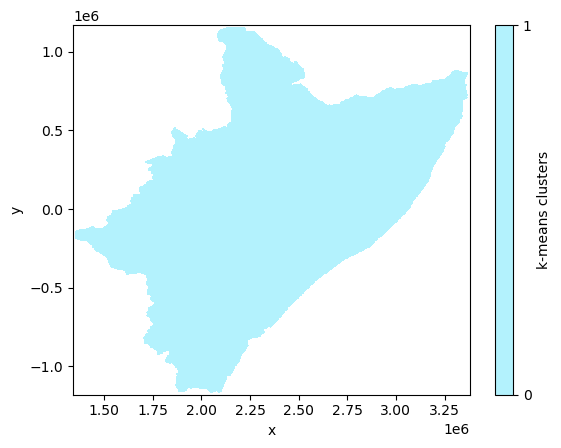

In [59]:

# skams.plot(cmap=cmc.bukavu, levels=len(kmeans)+1, vmin=0, vmax=len(kmeans))
skams.plot(cmap=cmc.hawaii_r, levels=len(kmeans)+1, vmin=0, vmax=len(kmeans))



# DO same but for 4 CLUSTERS #

In [77]:

# couple of realizations for 4 clusters
sfile = '../model_output/RUN_230901T1010_S1_nada_zero.nc'   # 4 CLUSTERS

# usually you do "mask_and_scale=True"... but not in this case!

ds = xr.open_mfdataset(sfile, group='run_02', combine='nested',# concat_dim='time',
    decode_times=True, use_cftime=True, decode_cf=True, mask_and_scale=True)#, data_vars=['rain'],)
ds = ds.assign_coords({'y':ds.projection_y_coordinate.load(),'x':ds.projection_x_coordinate.load()})

storm_x = ds[ 'year_2023' ].load()
skams_x = ds['k_means'].load()
ds.close()

# seasonal rain
season_x = ( storm_x.astype( 'f8' ).round(3) ).sum(axis=0)
# season[2:7,160:165]

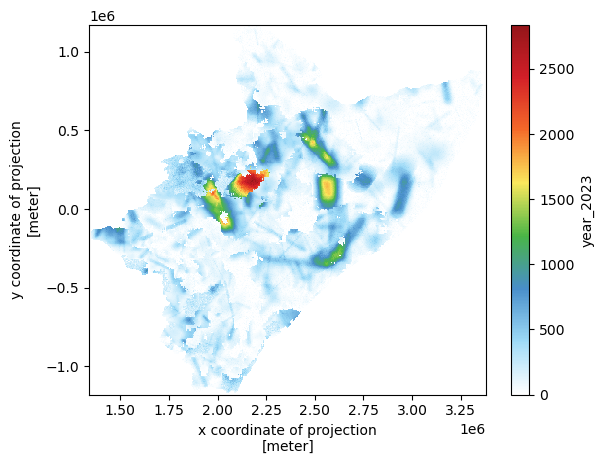

In [78]:

# season.plot(cmap='precip2_17lev')
season_x.plot(cmap='WhiteBlueGreenYellowRed')


In [79]:

# masks
kmeans = xr.where(skams_x!=-1, skams_x, np.nan)
# kmeans = skams_x.where(-1, np.nan)
kmeans = np.unique( kmeans.data )
kmeans = kmeans[ ~np.isnan(kmeans) ].astype('i1')
print( [xr.where(skams_x==x, skams_x, np.nan).count().data for x in kmeans] )


[array(5418), array(32407), array(33251), array(15217)]


In [101]:

# output kmeans
ks_x = list(map(lambda x:xr.where(skams_x==x, season_x, np.nan).mean().data, kmeans))
out_ks = pd.DataFrame({'k':kmeans, 'mean_nc4':ks_x}, dtype='object')

print( out_ks)



   k            mean_nc4
0  0   585.1801125876708
1  1   234.3012125775295
2  2  123.34646416649124
3  3   375.2105049615562


In [82]:


# input kmeans
in_ks = pd.read_csv(sfile.replace('.nc','_kmeans.csv'))

print(in_ks)


   k     mean_in            mean_out           mean_xtra
0  0   122.20316  123.01343482432205  122.84915667218301
1  1    374.7068  374.86894913237956   374.7010015098805
2  2   582.65515    582.956113011005   582.7885422042028
3  3   234.15459   234.3431215911475    234.178792987438
4  k     mean_in            mean_out           mean_xtra
5  0    582.8078   585.1803500996468   584.8981125876714
6  1   234.23451    234.303528511481  234.02055815101698
7  2  122.230225  123.34755948793945  123.06533824546656
8  3   374.87192   375.2136687682176  374.93388460274764


In [86]:


# KMEANS from IN/OUT

# careful! i chose 'run_02' then i must do 'in_ks.iloc[5:,:]'

kkmm = pd.merge(in_ks.iloc[5:,:].astype(str), out_ks.astype(str), how='left', on='k')
print(kkmm)


   k     mean_in            mean_out           mean_xtra            mean_nc4
0  0    582.8078   585.1803500996468   584.8981125876714   585.1801125876708
1  1   234.23451    234.303528511481  234.02055815101698   234.3012125775295
2  2  122.230225  123.34755948793945  123.06533824546656  123.34646416649124
3  3   374.87192   375.2136687682176  374.93388460274764   375.2105049615562


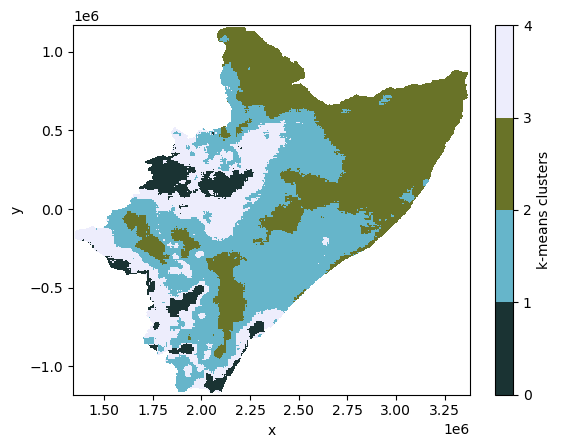

In [87]:

skams_x.plot(cmap=cmc.bukavu, levels=len(kmeans)+1, vmin=0, vmax=len(kmeans))
# skams_x.plot(cmap=cmc.hawaii_r, levels=len(kmeans)+1, vmin=0, vmax=len(kmeans))


## COMPARISON ##

In [91]:
import rioxarray as rio
from rasterio.enums import Resampling # IF you're doing BILINEAR or NEAREST too?


In [94]:
# define variables/parameters

RAIN_MAP = '../realisation_MAM_crs-OK.nc'                # yes.interpretable CRS
SUBGROUP = ''
CLUSTERS = 1#4                                          # number of regions to split the whole.region into

# OGC-WKT for HAD [taken from https://epsg.io/42106]
WKT_OGC = 'PROJCS["WGS84_/_Lambert_Azim_Mozambique",'\
    'GEOGCS["unknown",'\
        'DATUM["unknown",'\
            'SPHEROID["Normal Sphere (r=6370997)",6370997,0]],'\
        'PRIMEM["Greenwich",0,'\
            'AUTHORITY["EPSG","8901"]],'\
        'UNIT["degree",0.0174532925199433,'\
            'AUTHORITY["EPSG","9122"]]],'\
    'PROJECTION["Lambert_Azimuthal_Equal_Area"],'\
    'PARAMETER["latitude_of_center",5],'\
    'PARAMETER["longitude_of_center",20],'\
    'PARAMETER["false_easting",0],'\
    'PARAMETER["false_northing",0],'\
    'UNIT["metre",1,'\
        'AUTHORITY["EPSG","9001"]],'\
    'AXIS["Easting",EAST],'\
    'AXIS["Northing",NORTH],'\
    'AUTHORITY["EPSG","42106"]]'

yyss = np.linspace(1167500., -1177500., 470, endpoint=True)
xxss = np.linspace(1342500.,  3377500., 408, endpoint=True)


# create VOID
void = np.empty( (len(yyss),len(xxss)) )
void.fill(np.nan)

# create xarray
void = xr.DataArray(data=void, dims=['y', 'x']#, name='void'
    # , coords=dict(y=(['y'], YS), x=(['x'], XS), )
    , coords=dict(y=(['y'], yyss), x=(['x'], xxss), )
    , attrs=dict(_FillValue=np.nan, units='mm', ),
    )
# void = xr.DataArray(data=void, name='rain', dims=['time','lat', 'lon']
#     , coords=dict(time=(['time'],np.r_[1000,2000,3000,4000,5000])
#     , lat=(['lat'], np.r_[1,2,3,4,5,6,7]), lon=(['lon'], np.r_[1,2,3]), )
#     , attrs=dict(_FillValue=np.nan, units='mm', ))
# assign CRS
void.rio.write_crs(rio.crs.CRS( WKT_OGC ), grid_mapping_name='spatial_ref', inplace=True)


# more something
xile = rio.open_rasterio( RAIN_MAP , group=SUBGROUP )

# REMOVING the annoying BAND dimension (assuming we only have ONE band!)
if 'band' in list(xile.dims):
    for x in list(xile.data_vars):
        # https://stackoverflow.com/a/41836191/5885810
        xile[ x ] = xile[ x ].sel(band=1, drop=True)
    xile = xile.drop_dims(drop_dims='band')

xvar = xile.rio.grid_mapping
# actual crs
xcrs = xile.rio.crs
# # trasform4fun
# xtra = xile.rio.transform()
xile.close()

# xcrs.is_geographic
# renaming coordinates for 'easy' reprojection?
# https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/
c_xoid = list( void.coords.dims )
# ['y', 'x']
# ['lat', 'lon']
c_xile = list( xile.coords.dims )
# ['lat', 'lon']
# ['band', 'x', 'y']

# https://stackoverflow.com/a/176921/5885810
c_ids = list(map(lambda i:c_xile.index(i), c_xoid))

xile = xile.set_index(indexes=dict(zip( list(map(c_xile.__getitem__, c_ids)), c_xoid )),)

rain = xile.rio.reproject_match(void, resampling=Resampling.nearest )




In [95]:
rain

<xarray.Dataset>
Dimensions:   (x: 408, y: 470)
Coordinates:
  * x         (x) float64 1.342e+06 1.348e+06 1.352e+06 ... 3.372e+06 3.378e+06
  * y         (y) float64 1.168e+06 1.162e+06 ... -1.172e+06 -1.178e+06
    xomethin  int32 0
Data variables:
    rain      (y, x) float32 8.853 12.19 12.01 14.22 ... 527.5 527.5 526.5 526.5
    mask      (y, x) uint8 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0 0 0

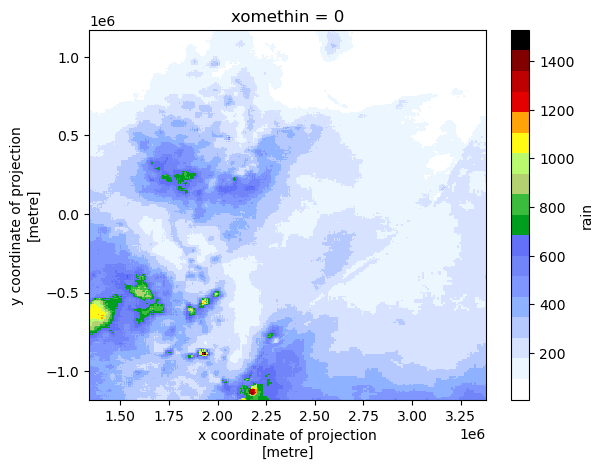

In [96]:
rain['rain'].plot(cmap='precip2_17lev')

In [98]:
# update rain
rain = rain['rain'].where( ~skams.isnull() )

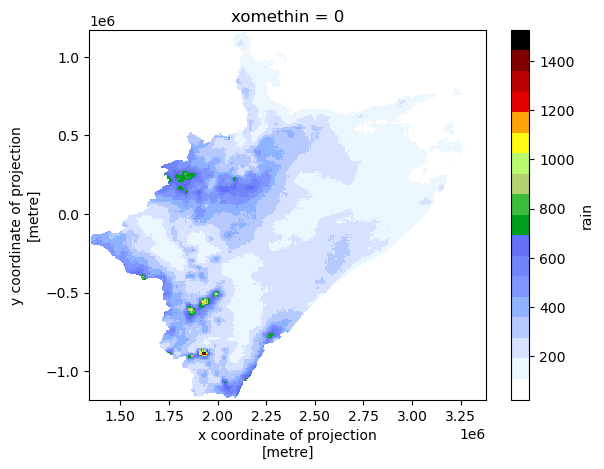

In [100]:
rain.plot(cmap='precip2_17lev')

the one with 4 clusters

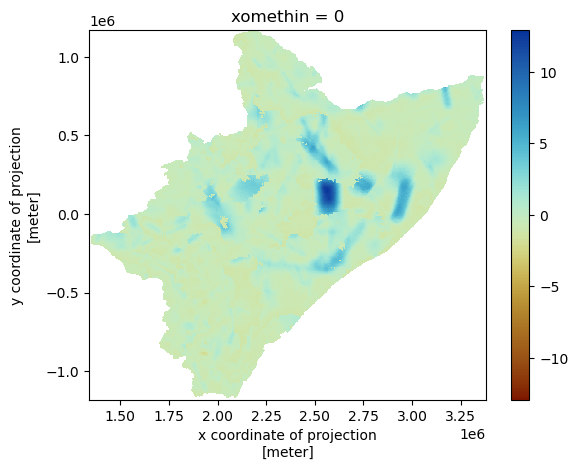

In [102]:
# run 1st the one with 4 CLUSTERS and...
#---------------------------------------
cfor = season_x.copy()
cfor = cfor.where( ~skams_x.isnull() )
# mask into averages
afor = [skams_x.where(skams_x!=i, item) for i, item in enumerate( ks_x )]
afor = xr.concat(afor, dim='mask').sum(dim='mask')#, skipna=True)
afor = afor.where( ~skams_x.isnull() )
# relative field
rfor = (cfor -rain) /afor
rfor.plot(cmap=cmc.roma)

the one with 1 cluster

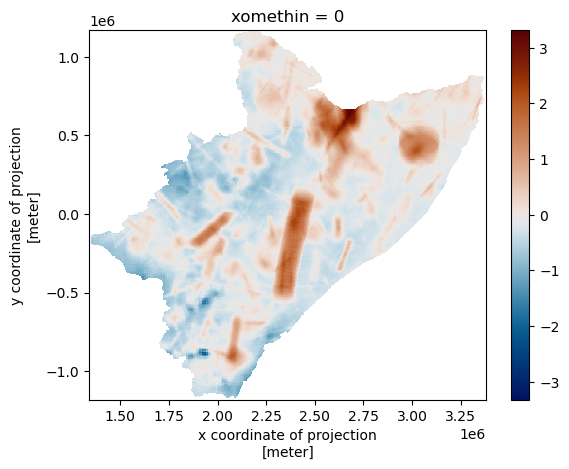

In [103]:
# run 2nd the one with 1 CLUSTER  and...
#---------------------------------------
cone = season.copy()
cone = cone.where( ~skams.isnull() )
# mask into averages
aone = [skams.where(skams!=i, item) for i, item in enumerate( ks )]
aone = xr.concat(aone, dim='mask').sum(dim='mask')#, skipna=True)
aone = aone.where( ~skams.isnull() )
# relative field
rone = (cone -rain) /aone
rone.plot(cmap=cmc.vik)


# PLOTTING
#---------

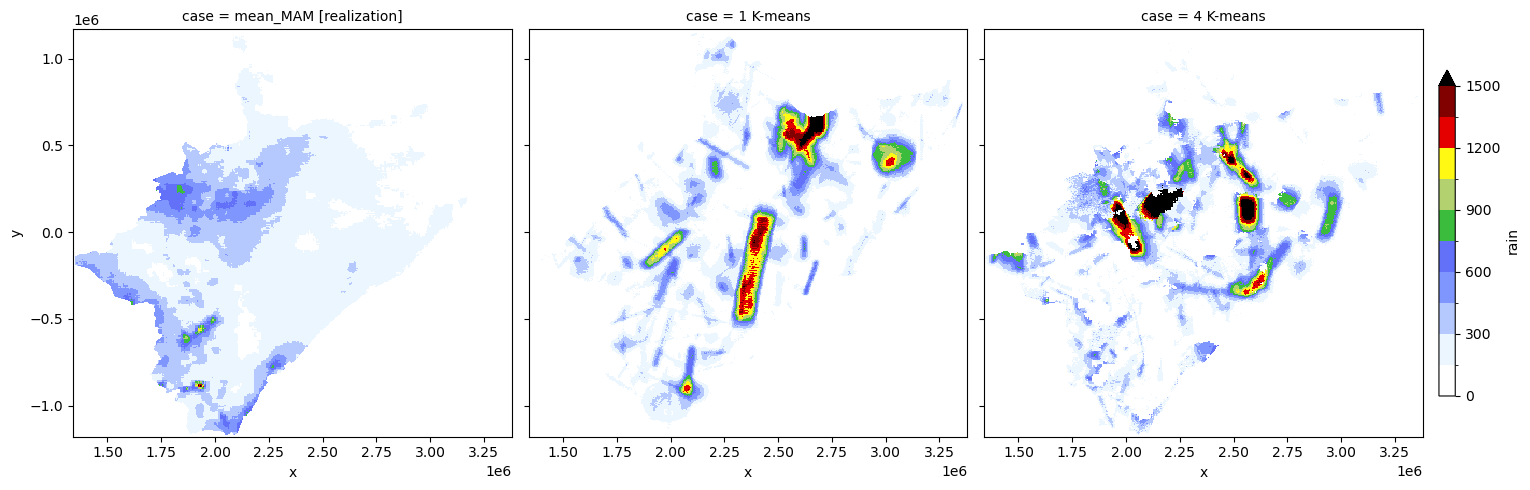

In [109]:
# rain
one_rain = xr.concat([rain, cone, cfor], dim='case')
one_rain = one_rain.assign_coords({'case':['mean_MAM [realization]','1 K-means','4 K-means']})

#fig, ax = plt.subplots(dpi=150)
one_rain.plot(figsize=(17,5), x='x', y='y', col='case', col_wrap=3,
    cmap='precip2_17lev', levels=11, vmin=0, vmax=1500, cbar_kwargs={'shrink':4/5, 'pad':+.01})
    # cmap='gist_ncar_r', vmin=0, vmax=2e3, cbar_kwargs={'shrink':4/5, 'pad':+.01})
# plt.savefig(f'realisation_plot01--rain.pdf', bbox_inches='tight',pad_inches=0.02, facecolor=fig.get_facecolor())
# plt.close()
# plt.clf()

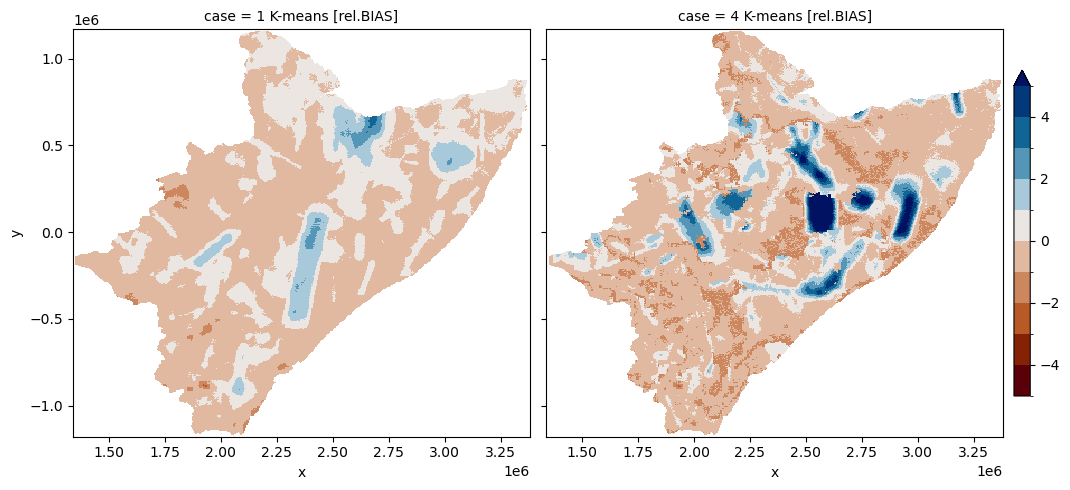

In [110]:
# diff
one_diff = xr.concat([rone, rfor], dim='case')
one_diff = one_diff.assign_coords({'case':['1 K-means [rel.BIAS]','4 K-means [rel.BIAS]']})

# fig, ax = plt.subplots(dpi=1500)
one_diff.plot(figsize=(12,5), x='x', y='y', col='case', col_wrap=2,# robust=True,
    cmap=cmc.vik_r, levels=11, vmin=-5, vmax=5, cbar_kwargs={'shrink':4/5, 'pad':+.01})
# plt.savefig(f'realisation_plot01--diff.pdf', bbox_inches='tight',pad_inches=0.02, facecolor=fig.get_facecolor())
# plt.close()
# plt.clf()

## 30 RUNS ##

![rains](./six_rain.jpg)

![diffs](./six_diff.jpg)